### Real Example (Breast Cancer)

In [13]:
# Use seaborn for pairplot.
!pip install -q seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\moham\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Importing Needed Libraries


In [14]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import tempfile
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Preset matplotlib figure sizes.
matplotlib.rcParams['figure.figsize'] = [9, 6]

Getting The Dataset

In [15]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
column_names = ['id', 'diagnosis']
#calculating mean, ste, and largest number for numeric values and adding them to new columns:
for attr in ['mean', 'ste', 'largest']:
  for feature in features:
    column_names.append(feature + "_" + attr)

Displaying the Dataset

In [16]:
dataset = pd.read_csv(url, names=column_names)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poinits_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_poinits_largest,symmetry_largest,fractal_dimension_largest
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
dataset = pd.read_csv(url, names=column_names)
dataset.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_poinits_mean         0
symmetry_mean                0
fractal_dimension_mean       0
radius_ste                   0
texture_ste                  0
perimeter_ste                0
area_ste                     0
smoothness_ste               0
compactness_ste              0
concavity_ste                0
concave_poinits_ste          0
symmetry_ste                 0
fractal_dimension_ste        0
radius_largest               0
texture_largest              0
perimeter_largest            0
area_largest                 0
smoothness_largest           0
compactness_largest          0
concavity_largest            0
concave_poinits_largest      0
symmetry_largest             0
fractal_dimension_largest    0
dtype: i

In [18]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poinits_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_poinits_largest,symmetry_largest,fractal_dimension_largest
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Analyzing the Dataset

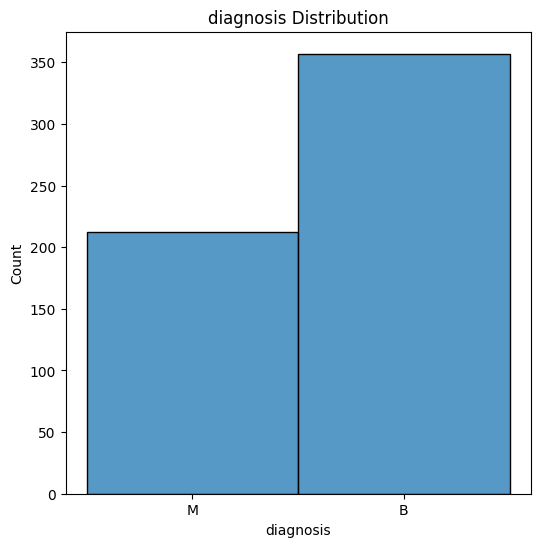

In [19]:
# distribution of Brand value

plt.figure(figsize=(6,6))
sns.histplot(dataset['diagnosis'])
plt.title('diagnosis Distribution')
plt.show()

Replacing non-Numeric Values

In [21]:
# encoding "Brand" Column
dataset['diagnosis'] = dataset['diagnosis'].map({'M':0,'B':1})

<Axes: >

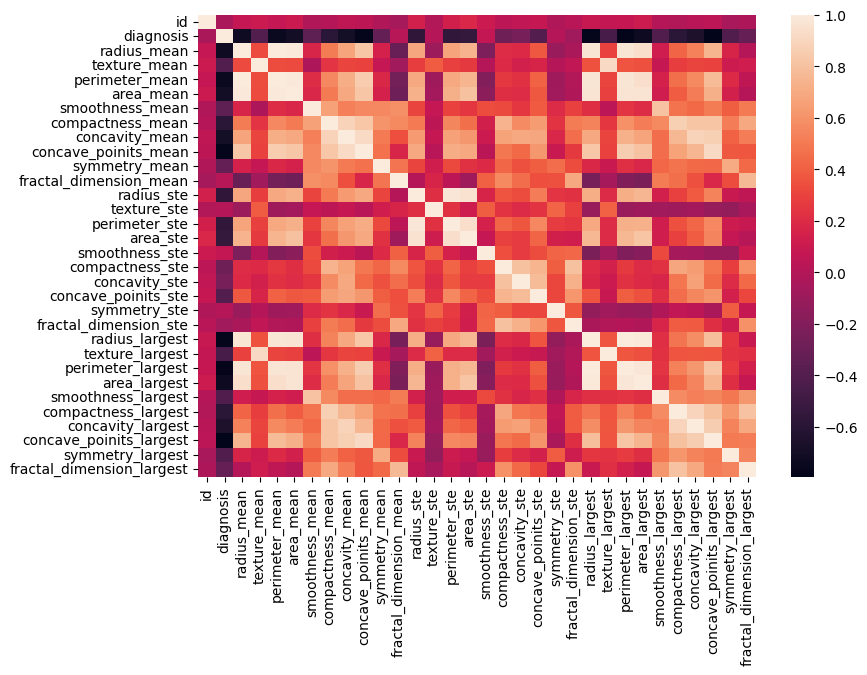

In [22]:
#getting all correlations between new features:
sns.heatmap(dataset.corr())

Splitting the Data into feautures (X) and labels (Y):

In [25]:
features = dataset.drop(['id','diagnosis'],axis=1)
labels = dataset['diagnosis']


Splitting Training, Test, and Validation data

In [26]:
# remark: we fix random_state the end, to make sure we always get the same split
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(
    features, labels, test_size=0.4, random_state=100)

In [27]:
features_validation, features_test, labels_validation, labels_test = train_test_split(
    features_validation_test, labels_validation_test, test_size=0.5, random_state=100)

In [28]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

341
114
114
341
114
114


# Building an SVM to separate a linear dataset

In [29]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
from sklearn.svm import SVC,SVR
import random

In [31]:
from sklearn.svm import SVC
# Create a linear SVM model
svm_linear = SVC(kernel='linear')
svm_linear.fit(features_train, labels_train)

print("Test Accuracy:", svm_linear.score(features_test, labels_test))
print("Validation Accuracy:", svm_linear.score(features_validation, labels_validation))


Test Accuracy: 0.9385964912280702
Validation Accuracy: 0.9736842105263158


In [32]:
# use linear SVM with C = 0.01

svm_c_001 = SVC(kernel='linear',C=0.01)
svm_c_001.fit(features_train, labels_train)
print("C = 0.01")
print("Test Accuracy:", svm_c_001.score(features_test, labels_test))
print("Validation Accuracy:", svm_c_001.score(features_validation, labels_validation))

# use linear SVM with C = 100
svm_c_100 = SVC(kernel='linear',C=100)
svm_c_100.fit(features_train, labels_train)
print("C = 100")
print("Test Accuracy:", svm_c_100.score(features_test, labels_test))
print("Validation Accuracy:", svm_c_100.score(features_validation, labels_validation))

C = 0.01
Test Accuracy: 0.9298245614035088
Validation Accuracy: 0.9736842105263158
C = 100
Test Accuracy: 0.9473684210526315
Validation Accuracy: 0.9824561403508771
